<a href="https://colab.research.google.com/github/yogaliu-ds/LSTM/blob/main/(LSTM)_MSFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Preprocessing

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 31.9 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
# Basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Flatten
from tensorflow.keras.optimizers import Adam

# Others
import yfinance as yf



In [3]:
# 1.1 API, get the data
df = yf.Ticker('MSFT').history(period='Max')

# only get part of the samples
df = df.iloc[:5000]

# Check it out
print(df.shape)
print(df.head())
print(df.tail())


(5000, 7)
                Open      High       Low     Close      Volume  Dividends  \
Date                                                                        
1986-03-13  0.055654  0.063838  0.055654  0.061109  1031788800        0.0   
1986-03-14  0.061109  0.064383  0.061109  0.063292   308160000        0.0   
1986-03-17  0.063292  0.064929  0.063292  0.064383   133171200        0.0   
1986-03-18  0.064383  0.064929  0.062201  0.062746    67766400        0.0   
1986-03-19  0.062746  0.063292  0.061109  0.061655    47894400        0.0   

            Stock Splits  
Date                      
1986-03-13           0.0  
1986-03-14           0.0  
1986-03-17           0.0  
1986-03-18           0.0  
1986-03-19           0.0  
                 Open       High        Low      Close    Volume  Dividends  \
Date                                                                          
2005-12-28  19.020543  19.128166  18.905746  18.934444  35444400        0.0   
2005-12-29  18.948790  1

In [4]:
# 1.2 MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index = df.index)
df_normed

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.000000,0.000159,0.000000,0.000117,1.000000,0.0,0.0
1986-03-14,0.000146,0.000174,0.000148,0.000175,0.297096,0.0,0.0
1986-03-17,0.000205,0.000188,0.000208,0.000204,0.127119,0.0,0.0
1986-03-18,0.000234,0.000188,0.000178,0.000161,0.063588,0.0,0.0
1986-03-19,0.000190,0.000145,0.000148,0.000131,0.044285,0.0,0.0
...,...,...,...,...,...,...,...
2005-12-28,0.508923,0.506707,0.512871,0.505000,0.032191,0.0,0.0
2005-12-29,0.506997,0.503657,0.511114,0.502697,0.031270,0.0,0.0
2005-12-30,0.501991,0.500034,0.507990,0.500394,0.045402,0.0,0.0


In [5]:
# 1.3 Transform the data into 3d

import tqdm
n = 30
feature_names = list(df_normed.drop('Close', axis =1).columns)

X=[]
y=[]
indexes=[]
norm_data_x = df_normed[feature_names]

for i in tqdm.tqdm_notebook(range(0, len(df_normed)-n)):
  X.append(norm_data_x.iloc[i:i+n].values)
  y.append(df_normed['Close'].iloc[i+n-1])
  indexes.append(df_normed.index[i+n-1])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if sys.path[0] == '':


  0%|          | 0/4970 [00:00<?, ?it/s]

[[0.00000000e+00 1.59477205e-04 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.46407451e-04 1.73973228e-04 1.48441766e-04 2.97096179e-01
  0.00000000e+00 0.00000000e+00]
 [2.04970629e-04 1.88469725e-04 2.07818673e-04 1.27119118e-01
  0.00000000e+00 0.00000000e+00]
 [2.34268424e-04 1.88469115e-04 1.78129645e-04 6.35875343e-02
  0.00000000e+00 0.00000000e+00]
 [1.90329552e-04 1.44963413e-04 1.48441523e-04 4.42846752e-02
  0.00000000e+00 0.00000000e+00]
 [1.61048764e-04 1.01474841e-04 1.03909642e-04 5.45235831e-02
  0.00000000e+00 0.00000000e+00]
 [1.17126683e-04 8.69786705e-05 4.45330353e-05 5.60342416e-02
  0.00000000e+00 0.00000000e+00]
 [7.32044986e-05 1.44965791e-05 1.48447724e-05 6.11816707e-02
  0.00000000e+00 0.00000000e+00]
 [2.92820029e-05 0.00000000e+00 1.48446507e-05 2.89263134e-02
  0.00000000e+00 0.00000000e+00]
 [5.85629206e-05 5.79851411e-05 4.45324298e-05 1.98623622e-02
  0.00000000e+00 0.00000000e+00]
 [1.02485461e-04 7.24817797e-05 1.03909485e-04 1.4

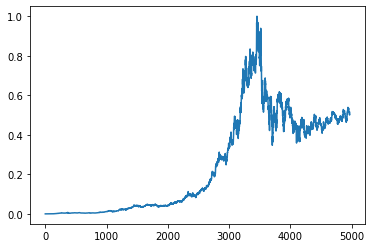

In [6]:
# 30 days info and 1 prediction
print(X[0])
print(y[0])
print(indexes[0])


plt.plot(y)
plt.show()

In [7]:
# Transform into np.array

X=np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)


(4970, 30, 6)
(4970,)


In [8]:
# Train, val split

sample_size = X.shape[0]

X_train = X[:int(sample_size*0.9)]
X_val = X[int(sample_size*0.1):]

y_train = y[:int(sample_size*0.9)]
y_val = y[int(sample_size*0.1):]

# 2. Model

In [9]:
# Build LSTM
n_steps = 30
n_features = df.shape[1] -1


model = Sequential()
model.add(LSTM(30, return_sequences=False, batch_input_shape= (None, n_steps, n_features)))
# model.add(Flatten())
# model.add(Dense(14))
model.add(Dense(5))
model.add(Dense(1))

adam = Adam(learning_rate = 0.1)
model.compile(optimizer=adam, loss='mse', metrics = ['mse', 'mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                4440      
                                                                 
 dense (Dense)               (None, 5)                 155       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 4,601
Trainable params: 4,601
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Model fit and Predict
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=0)
train_pred = model.predict(X_train)


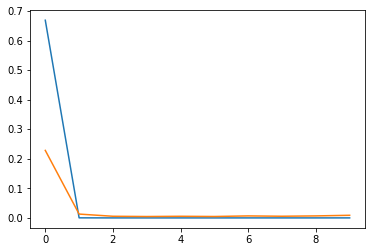

In [11]:
# Evaluate the loss (by metrics)

plt.plot(history.history['mse'])
plt.plot(history.history['mae'])
plt.show()

In [12]:
# Evaluate the loss (by loss)
result = model.evaluate(X_train, y_train, batch_size = 64)
print(result)

70/70 [==============================] - 2s 8ms/step - loss: 2.7588e-05 - mse: 2.7588e-05 - mae: 0.0030
[2.7587899239733815e-05, 2.7587899239733815e-05, 0.003040899056941271]


In [16]:
# Evaluate the loss (by loss)
result = model.evaluate(X_val, y_val, batch_size = 64)
print(result)

70/70 [==============================] - 1s 8ms/step - loss: 5.8037e-05 - mse: 5.8037e-05 - mae: 0.0034
[5.803662133985199e-05, 5.803662133985199e-05, 0.003380700247362256]


In [13]:
# Prediction
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

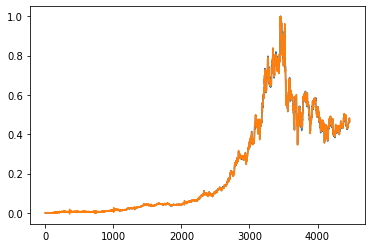

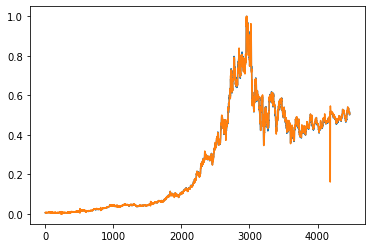

In [14]:
# Plot Prediction and real

# plot Training

plt.plot(y_train)
plt.plot(pred_train)
plt.show()

# plot Val

plt.plot(y_val)
plt.plot(pred_val)
plt.show()

# Note and To do

In [ ]:
# Try not normalize but make it stationary. I think that's more reasonable.